# Computer Infrastructure Problems

This notebook covers the problems covered in the ATU module Computer Infrastructure.

## Problem 1: Data from yfinance

> Using the yfinance Python package, write a function called get_data() that downloads all hourly data for the previous five days for the five FAANG stocks:

> - Facebook (META)
> - Apple (AAPL)
> - Amazon (AMZN)
> - Netflix (NFLX)
> - Google (GOOG)

> The function should save the data into a folder called data in the root of your repository using a filename with the format YYYYMMDD-HHmmss.csv where YYYYMMDD is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. 09 for September), followed by the two digit day, and HHmmss is hour, minutes, seconds. Create the data folder if you don't already have one.

First I begin by importing the necessary libraries. For this project I will need yfinance to access the Y!Finance api, datetime for handling dates, and pandas for handling data frames.

In [1]:
# https://ranaroussi.github.io/yfinance/reference/index.html
import yfinance as yf

# https://docs.python.org/3/library/datetime.html
import datetime as dt

# https://pandas.pydata.org/docs/
import pandas as pd

Next, I created a function that downloaded and saved to a CSV file the stock information for the 5 FAANG companies: Meta, Apple, Amazon, Netflix and Google.

When trying to get `with open` to create the file, I used [this](https://note.nkmk.me/en/python-file-io-open-with/#create-a-file-only-if-it-doesnt-exist) resource to understand the mode `x` to create a file, but after some investigation, it was better to use pandas `.to_csv` than to use `with open`.

When trying to get a formatted `datetime` string, I looked at the [datetime documentation](https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior) to find out how `strftime` should be formatted.

In [2]:
# Create a function to get the data from Yahoo Finance and save it as a CSV file
def get_data():
    # Download historical data for multiple tickers
    data = yf.download(["META", "AAPL", "AMZN", "NFLX", "GOOG"], period="5d", interval="1h")
    # Save the data to a CSV file with a timestamped filename
    # The filename format is YYYYMMDD_HHMMSS.csv
    # References:
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html
    # https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior
    data.to_csv(f"data/{dt.datetime.now().strftime('%Y%m%d_%H%M%S')}.csv")
    return data

Let's run this function and see what it returns.

In [3]:
# Call the function and display the first few rows of the data
get_data().head()

C:\Users\luxxx\AppData\Local\Temp\ipykernel_8376\531233645.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(["META", "AAPL", "AMZN", "NFLX", "GOOG"], period="5d", interval="1h")
[*********************100%***********************]  5 of 5 completed


Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-11-10 14:30:00+00:00  271.856995  248.029999  288.720001  633.837402   
2025-11-10 15:30:00+00:00  269.066406  246.380005  286.965515  630.409973   
2025-11-10 16:30:00+00:00  269.079987  247.104996  287.309998  633.864990   
2025-11-10 17:30:00+00:00  269.730011  248.630005  288.839996  632.840027   
2025-11-10 18:30:00+00:00  269.660004  248.769897  291.100006  632.780029   

Price                                         High                          \
Ticker                            NFLX        AAPL        AMZN        GOOG   
Datetime                                                                     
2025-11-10 14:30:00+00:00  1124.795044  273.730011  251.750000  290.429993   
2025-11-10 15:30:00+00:00  1116.630005  271.989990  248.089996  289.269897   
2025-11-10 16:30:00+00:00  1116.839844  269.758789  247.445007  287.579987   
2025-11-10 17:30:00+00:00  1115.630005  270.230011  248.899994  289.329987   
2025-11-10 18:30:00+00:00  1115.599976  270.307709  248.956406  291.429993   

Price                                               ...        Open  \
Ticker                           META         NFLX  ...        AAPL   
Datetime                                            ...               
2025-11-10 14:30:00+00:00  634.960022  1128.189941  ...  268.950012   
2025-11-10 15:30:00+00:00  633.880005  1127.155029  ...  271.829987   
2025-11-10 16:30:00+00:00  634.460022  1122.250000  ...  269.040009   
2025-11-10 17:30:00+00:00  635.000000  1118.727173  ...  269.070007   
2025-11-10 18:30:00+00:00  634.650024  1118.180054  ...  269.709991   

Price                                                                       \
Ticker                           AMZN        GOOG        META         NFLX   
Datetime                                                                     
2025-11-10 14:30:00+00:00  248.309998  285.209991  631.390015  1107.099976   
2025-11-10 15:30:00+00:00  248.021194  288.704987  633.630005  1124.800049   
2025-11-10 16:30:00+00:00  246.339996  286.945007  630.409973  1116.630005   
2025-11-10 17:30:00+00:00  247.104996  287.339996  633.929993  1116.666382   
2025-11-10 18:30:00+00:00  248.653000  288.869995  632.840027  1115.650024   

Price                       Volume                                     
Ticker                        AAPL     AMZN     GOOG     META    NFLX  
Datetime                                                               
2025-11-10 14:30:00+00:00  7030981  7213922  4164797  3873187  720526  
2025-11-10 15:30:00+00:00  3083676  3238084  1570763  1532229  257424  
2025-11-10 16:30:00+00:00  2346213  2393779   892605  1088389  175811  
2025-11-10 17:30:00+00:00  1807442  1959822   743976   879505  162437  
2025-11-10 18:30:00+00:00  3188667  1461943  1315791   781607  171050  

[5 rows x 25 columns]

It returns a pandas data frame. I have already saved it to a CSV file so I can now open one of these files and view its contents.

In [4]:
# I can now open one of these files and view its contents.
with open ("data/20251006_220432.csv", 'r') as f:
    print(f.read(500))

Price,Close,Close,Close,Close,Close,High,High,High,High,High,Low,Low,Low,Low,Low,Open,Open,Open,Open,Open,Volume,Volume,Volume,Volume,Volume
Ticker,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,NFLX
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,
2025-09-30 13:30:00+00:00,254.88619995117188,218.91000366210938,240.52499389648438,729.1849975585938,1183.02001953125,255.91900634765625,222.0800018310547,243.0,740.4749755859375,1204.300048828


It looks like there are two header rows and an index row. I will have to ammend the header keyword argument to accomodate the multi-headers. The header rows are at index 0 and 1.

In [5]:
# Now I will read the CSV file into a pandas DataFrame
# I will use the header and index_col arguments to properly format the DataFrame
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/p
data = pd.read_csv("data/20251006_220432.csv", header=[0, 1], index_col=0, parse_dates=True)
data.head()

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-09-30 13:30:00+00:00  254.886200  218.910004  240.524994  729.184998   
2025-09-30 14:30:00+00:00  254.220001  218.744995  240.229996  732.609985   
2025-09-30 15:30:00+00:00  254.535095  219.330002  241.839996  734.190002   
2025-09-30 16:30:00+00:00  253.735001  219.259995  241.570007  728.349976   
2025-09-30 17:30:00+00:00  253.339996  219.249496  241.690002  731.000000   

Price                                         High                          \
Ticker                            NFLX        AAPL        AMZN        GOOG   
Datetime                                                                     
2025-09-30 13:30:00+00:00  1183.020020  255.919006  222.080002  243.000000   
2025-09-30 14:30:00+00:00  1188.250000  255.675003  219.740005  242.009995   
2025-09-30 15:30:00+00:00  1188.724976  254.970001  219.539993  242.229996   
2025-09-30 16:30:00+00:00  1186.150024  254.669998  219.539993  242.440002   
2025-09-30 17:30:00+00:00  1191.665039  253.990005  219.309998  242.020004   

Price                                               ...        Open  \
Ticker                           META         NFLX  ...        AAPL   
Datetime                                            ...               
2025-09-30 13:30:00+00:00  740.474976  1204.300049  ...  255.000000   
2025-09-30 14:30:00+00:00  735.409912  1190.369995  ...  254.910004   
2025-09-30 15:30:00+00:00  735.679993  1192.849976  ...  254.210007   
2025-09-30 16:30:00+00:00  734.419983  1190.859863  ...  254.550598   
2025-09-30 17:30:00+00:00  732.770020  1192.719971  ...  253.759995   

Price                                                                       \
Ticker                           AMZN        GOOG        META         NFLX   
Datetime                                                                     
2025-09-30 13:30:00+00:00  222.000000  243.000000  740.000000  1204.000000   
2025-09-30 14:30:00+00:00  218.910004  240.539993  729.140015  1182.970947   
2025-09-30 15:30:00+00:00  218.735001  240.220001  732.440002  1188.420044   
2025-09-30 16:30:00+00:00  219.330002  241.869995  734.262512  1188.969971   
2025-09-30 17:30:00+00:00  219.250000  241.559998  728.250000  1185.720093   

Price                       Volume                                     
Ticker                        AAPL     AMZN     GOOG     META    NFLX  
Datetime                                                               
2025-09-30 13:30:00+00:00  5093340  8368186  4050751  2579030  800232  
2025-09-30 14:30:00+00:00  2465164  3893057  1612529  1134276  253120  
2025-09-30 15:30:00+00:00  1531480  2497936  1214548   860168  139930  
2025-09-30 16:30:00+00:00  1623333  2002183  1006183   729726  165099  
2025-09-30 17:30:00+00:00  1664288  1935636   725820   586561  123599  

[5 rows x 25 columns]

I have successfully downloaded the data, saved it as a CSV file with the appropriate name in the appropriate folder in the repository and imported the information from the file back into a readable dataframe. 

## Problem 2: Plotting Data

> Write a function called `plot_data()` that opens the latest data file in the `data` folder and, on one plot, plots the `Close` prices for each of the five stocks. The plot should include axis labels, a legend, and the date as a title. The function should save the plot into a `plots` folder in the root of your repository using a filename in the format `YYYYMMDD-HHmmss.png`. Create the `plots` folder if you don't already have one.

Here I import the necessary modules for the next problem. Glob to help read file systems, os to read file info and matplotlib to create figures to represent the data.

In [6]:
# Glob is a module that finds all the pathnames matching a specified pattern
import glob

# OS module provides a way of using operating system dependent functionality
import os

# Matplotlib is a plotting library for the Python programming language
import matplotlib.pyplot as plt

To open the latest file in a folder I found [this stack overflow page](https://stackoverflow.com/questions/39327032/how-to-get-the-latest-file-in-a-folder) that mentions a method of making a list of the file and taking the max of that list according to the creation time of the files. 

In [7]:
# Get a list of all CSV files in the data directory
list_of_files = glob.glob('data/*.csv')
# Find the latest CSV file in the data directory sorting by creation time
latest_file = max(list_of_files, key=os.path.getctime)

# Read the latest CSV file into a pandas DataFrame
# Using header and index_col arguments to properly format the DataFrame
# Reference:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
data = pd.read_csv(latest_file, header=[0, 1], index_col=0, parse_dates=True)
data.head()

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-11-10 14:30:00+00:00  271.856995  248.029999  288.720001  633.837402   
2025-11-10 15:30:00+00:00  269.066406  246.380005  286.965515  630.409973   
2025-11-10 16:30:00+00:00  269.079987  247.104996  287.309998  633.864990   
2025-11-10 17:30:00+00:00  269.730011  248.630005  288.839996  632.840027   
2025-11-10 18:30:00+00:00  269.660004  248.769897  291.100006  632.780029   

Price                                         High                          \
Ticker                            NFLX        AAPL        AMZN        GOOG   
Datetime                                                                     
2025-11-10 14:30:00+00:00  1124.795044  273.730011  251.750000  290.429993   
2025-11-10 15:30:00+00:00  1116.630005  271.989990  248.089996  289.269897   
2025-11-10 16:30:00+00:00  1116.839844  269.758789  247.445007  287.579987   
2025-11-10 17:30:00+00:00  1115.630005  270.230011  248.899994  289.329987   
2025-11-10 18:30:00+00:00  1115.599976  270.307709  248.956406  291.429993   

Price                                               ...        Open  \
Ticker                           META         NFLX  ...        AAPL   
Datetime                                            ...               
2025-11-10 14:30:00+00:00  634.960022  1128.189941  ...  268.950012   
2025-11-10 15:30:00+00:00  633.880005  1127.155029  ...  271.829987   
2025-11-10 16:30:00+00:00  634.460022  1122.250000  ...  269.040009   
2025-11-10 17:30:00+00:00  635.000000  1118.727173  ...  269.070007   
2025-11-10 18:30:00+00:00  634.650024  1118.180054  ...  269.709991   

Price                                                                       \
Ticker                           AMZN        GOOG        META         NFLX   
Datetime                                                                     
2025-11-10 14:30:00+00:00  248.309998  285.209991  631.390015  1107.099976   
2025-11-10 15:30:00+00:00  248.021194  288.704987  633.630005  1124.800049   
2025-11-10 16:30:00+00:00  246.339996  286.945007  630.409973  1116.630005   
2025-11-10 17:30:00+00:00  247.104996  287.339996  633.929993  1116.666382   
2025-11-10 18:30:00+00:00  248.653000  288.869995  632.840027  1115.650024   

Price                       Volume                                     
Ticker                        AAPL     AMZN     GOOG     META    NFLX  
Datetime                                                               
2025-11-10 14:30:00+00:00  7030981  7213922  4164797  3873187  720526  
2025-11-10 15:30:00+00:00  3083676  3238084  1570763  1532229  257424  
2025-11-10 16:30:00+00:00  2346213  2393779   892605  1088389  175811  
2025-11-10 17:30:00+00:00  1807442  1959822   743976   879505  162437  
2025-11-10 18:30:00+00:00  3188667  1461943  1315791   781607  171050  

[5 rows x 25 columns]

In order to make the xticks ledgible I consulted [this](https://stackoverflow.com/questions/10998621/rotate-axis-tick-labels) resource that suggested using `plt.xticks(rotation=90)` to get the desired effect. I modified the code from the resource and have implemented my own version of it.

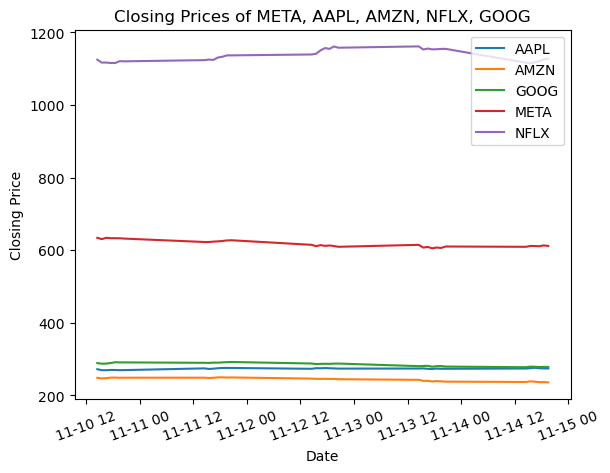

In [8]:
# Plot the closing prices of the stocks
plt.plot(data['Close'])

# Add labels and title to the plot
plt.title('Closing Prices of META, AAPL, AMZN, NFLX, GOOG')

# Add a legend, rotate x-axis labels, and show the plot
plt.legend(data['Close'].columns)
plt.xticks(rotation=20)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

# Close the plot to free up memory
plt.close()


In the next section I create a function that will perform the above task in one call.

When researching how to strip a filename of an extension I found [this](https://stackoverflow.com/questions/3548673/how-can-i-replace-or-strip-an-extension-from-a-filename-in-python) resource that suggested using `os.path.splitext`. I ammended the implimentation to suit my needs in this case.

I also found [this](https://stackoverflow.com/questions/9622163/save-plot-to-image-file-instead-of-displaying-it) resource that explained how to save a plot as a png file.

In [ ]:
# Create a function to plot the data from the latest CSV file

def plot_data():
    list_of_files = glob.glob('data/*.csv')
    latest_file = max(list_of_files, key=os.path.getctime)
    data = pd.read_csv(latest_file, header=[0, 1], index_col=0, parse_dates=True)
    fig = data.plot(y='Close',
                    title='Closing Prices of META, AAPL, AMZN, NFLX, GOOG',
                    xlabel='Date',
                    ylabel='Closing Price',
                    rot=20,
                    legend=True)
    fig.figure.savefig(f"plots/{os.path.splitext(latest_file)[0][5:]}.png")
    

I can now call the function to perform all of these tasks.

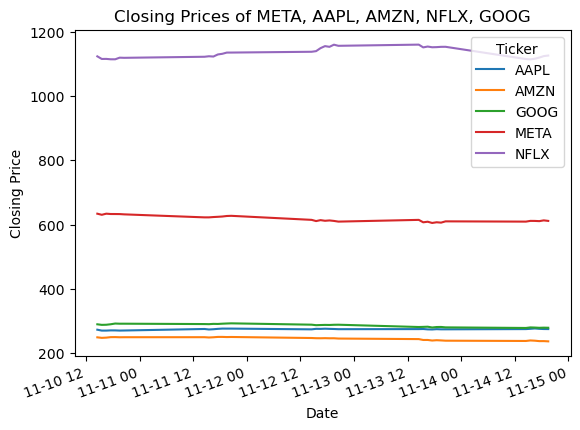

In [10]:
plot_data()

## Problem 3: Script

> Create a Python script called `faang.py` in the root of your repository. Copy the above functions into it and it so that whenever someone at the terminal types `./faang.py`, the script runs, downloading the data and creating the plot. Note that this will require a shebang line and the script to be marked executable. Explain the steps you took in your notebook.

## Problem 4: Automation

> Create a [GitHub Actions workflow](https://docs.github.com/en/actions) to run your script every Saturday morning. The script should be called `faang.yml` in a `.github/workflows/` folder in the root of your repository. In your notebook, explain each of the individual lines in your workflow.

## End